In [8]:
#First import the relevant packages
import pandas as pd

#import dataset
StudentsPerformance = pd.read_csv('StudentsPerformance.csv') #import the file. If the file is not in the same location as this script you need to write out the whole path
StudentsPerformance.head() #Check the first 5 entries



,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


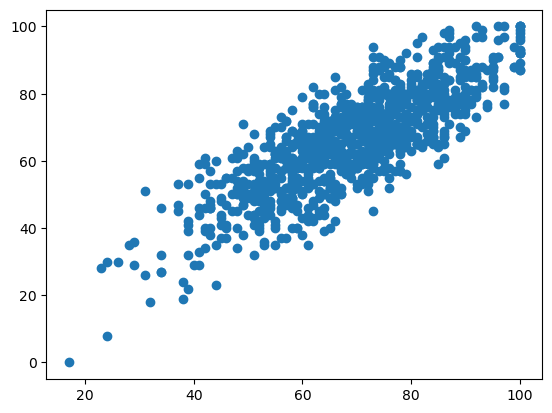

In [9]:
#Making Scatterplots

#first import the relevant package
import matplotlib.pyplot as plt

#Extract the relevant variables
reading_score = StudentsPerformance['reading_score']
math_score = StudentsPerformance['math_score']

#Create basic scatterplot between reading_score (x-axis) and math_score (y-axis)
plt.scatter(reading_score, math_score)



Text(0, 0.5, 'Math Score')

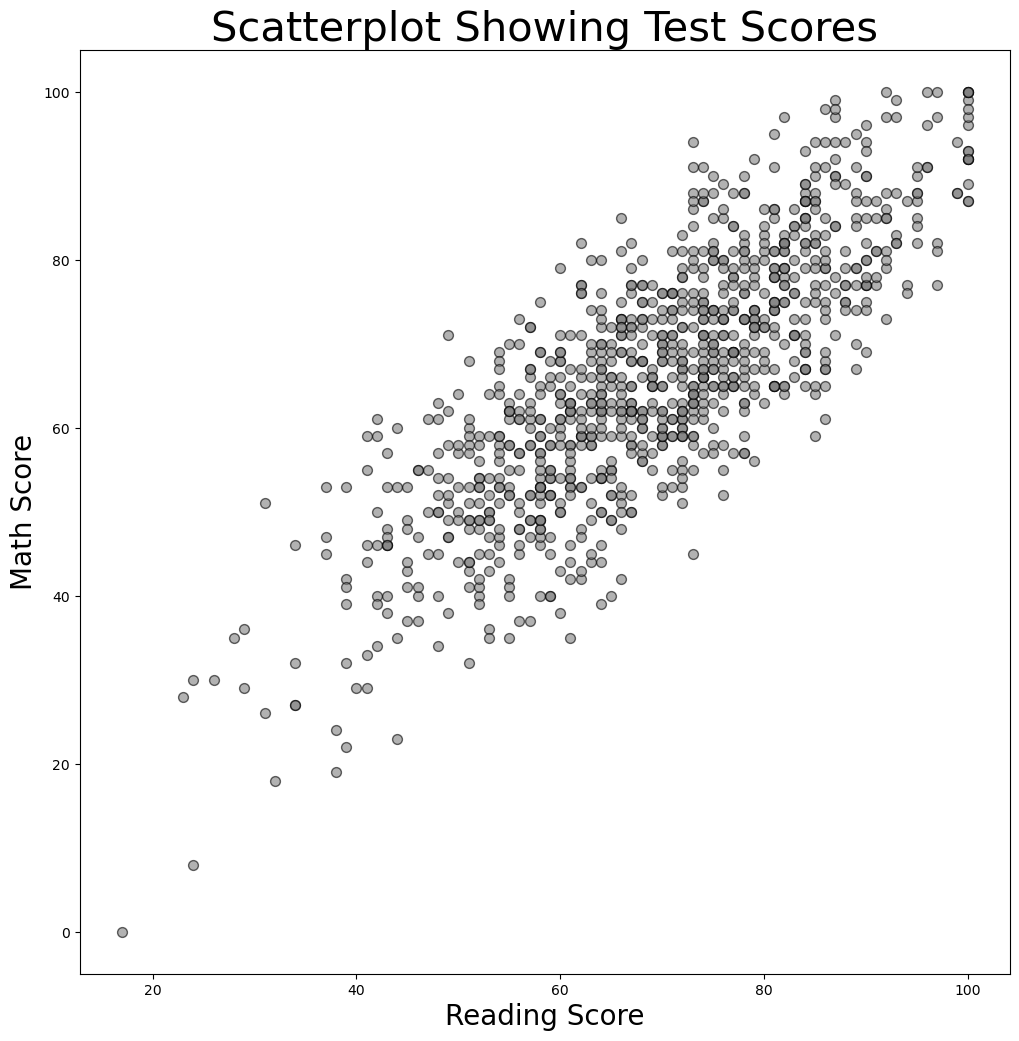

In [10]:
#Making the scatterplot look better
plt.figure(figsize=(12,12)) #Making the scatterplot bigger (this line always has to go first). Warning: it messes up the code above so you need to restart the kernel if you want to run the above code.

#Change how the dots look
plt.scatter(reading_score, math_score,
           s=50,alpha=0.6,color='grey', edgecolor='black') 
#s changes the size of the dots, alpha changes transparancy, color changes the dot's colors, edgecolor the color around the dots

#Add title and axis labels
plt.title('Scatterplot Showing Test Scores',fontsize=30)
plt.xlabel('Reading Score',fontsize=20)
plt.ylabel('Math Score',fontsize=20)



In [11]:
#correlations

#We will use the scipy package
import scipy.stats

#calculate the correlation (also known as Pearson's r)
scipy.stats.pearsonr(reading_score,math_score)

#the ouput shows two numbers: 
#the first shows the correlation coefficient (here: 0.817579663672054)
#the second shows the p-value (here: 1.787753109905834e-241)
    #note that 1.787753109905834e-241 means 1.787753109905834 * (1/10^241). So in other words, a very very very small number. 
    #in practical terms this means that it is very statistically significant because a smaller p-value means it's more significant



PearsonRResult(statistic=np.float64(0.8175796636720543), pvalue=np.float64(1.7877531099052422e-241))

PearsonRResult(statistic=np.float64(0.9545980771462479), pvalue=np.float64(0.0))

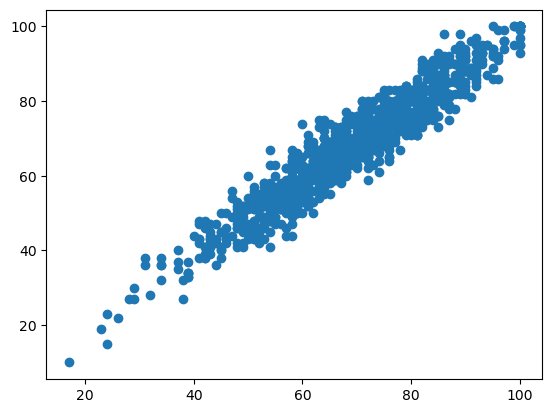

In [12]:
#Exercise 1 Solution
#first import the relevant package
import matplotlib.pyplot as plt

#Extract the relevant variables
reading_score = StudentsPerformance['reading_score']
writing_score = StudentsPerformance['writing_score']

#Create basic scatterplot between reading_score (x-axis) and math_score (y-axis)
plt.scatter(reading_score, writing_score)

import scipy.stats
scipy.stats.pearsonr(reading_score,writing_score)

               reading_score  writing_score  math_score
reading_score       1.000000       0.954598    0.817580
writing_score       0.954598       1.000000    0.802642
math_score          0.817580       0.802642    1.000000


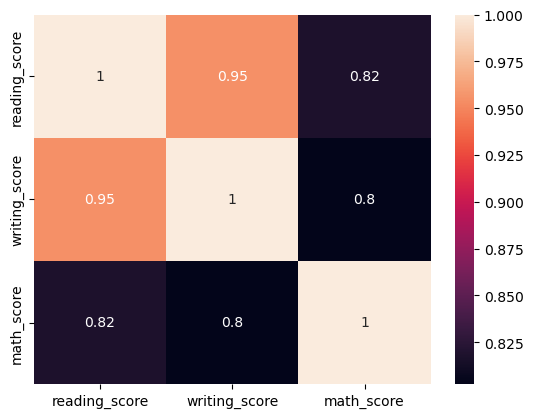

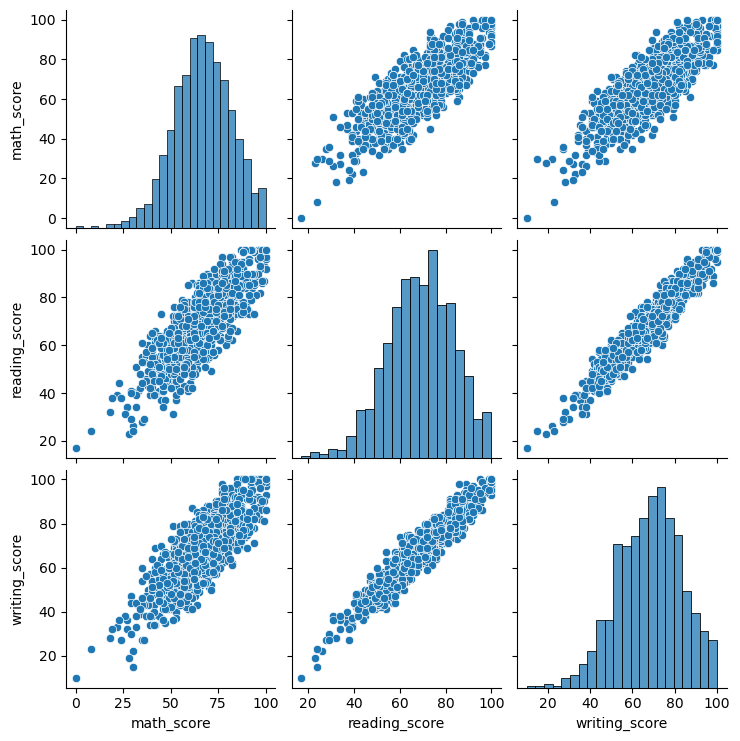

In [13]:
#correlation matrix (it will only include numerical values)
data = StudentsPerformance[['reading_score','writing_score','math_score']] #using [[ ]] allows you to select specific columns
matrix = data.corr()
print(matrix)

#heatmap (makes it easier to see the correlations, especially if there are many variables)
import seaborn as sn
sn.heatmap(matrix, annot=True) #the annot part shows the correlation coefficient numbers in the squares

#scatterplot matrix (the bar graphs show the distribution of the variables)
sn.pairplot(StudentsPerformance)

In [14]:
#regression

#first import the excel file with pandas
import pandas as pd
Age_Income = pd.read_excel('Age_Income.xlsx')
Age_Income.head()

#extract variables
Age = Age_Income['Age']
Income = Age_Income['Income']

#create a simple scatterplot to explore the data
import matplotlib.pyplot as plt
plt.scatter(Age,Income)



FileNotFoundError: [Errno 2] No such file or directory: 'Age_Income.xlsx'

<AxesSubplot:xlabel='Age', ylabel='Income'>

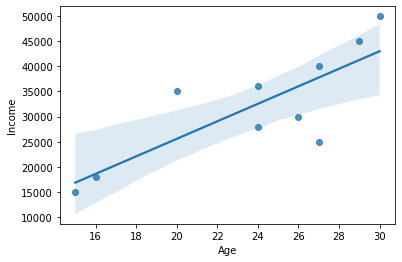

In [ ]:
#with the seaborn package we can also add a regression line!
import seaborn as sn
sn.regplot(x = 'Age', y = 'Income', data = Age_Income)

In [ ]:
#creating a simple regression model predicting age using income

import statsmodels.formula.api as sm

model1 = sm.ols('Income ~ Age', data = Age_Income).fit()

print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     15.13
Date:                Mon, 19 Dec 2022   Prob (F-statistic):            0.00461
Time:                        14:10:28   Log-Likelihood:                -101.62
No. Observations:                  10   AIC:                             207.2
Df Residuals:                       8   BIC:                             207.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9362.0690   1.09e+04     -0.858      0.4

C:\Users\fleep\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
#Exercise 2 solutions

import statsmodels.formula.api as sm

model2 = sm.ols('Income~Experience',data=Age_Income).fit()

print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     42.14
Date:                Mon, 19 Dec 2022   Prob (F-statistic):           0.000190
Time:                        14:23:48   Log-Likelihood:                -97.752
No. Observations:                  10   AIC:                             199.5
Df Residuals:                       8   BIC:                             200.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.658e+04   2838.090      5.842      0.0

C:\Users\fleep\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
